# U.S. Presidential Election
## Libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

import sys

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

import seaborn as sns
sns.set()

sys.path.append('..')
from lmapper.filter import Projection
from lmapper.filter import Filter

from lmapper.cutoff import FirstGap

import utils

from utils import get_node_size, get_mean_node, get_mapper
from utils import get_unique_cluster_vals, get_county_plot_data
from utils import get_weighted_electors_plot
from utils import get_colored_mapper_plot
from utils import get_colored_mapper_3dplot
from filters import SvdFilter, LpFilter, LogisticRegressionFilter
from filters import LogSvdFilter, LogProjectionFilter
from filters import TrafoSvdFilter
from plotting import mapper_nx_plot, county_plot, mapper_plotly_plot

../lmapper/cpp/filterutils


The Python implementation of the eccentricity is used instead, but it will be slower.
The scipy.distance.cdist implementation is used instead.


In [2]:
# define color map to use
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",
                                                           ["blue", "violet", "red"])

In [3]:
df = pd.read_pickle(os.path.join('data',
                                 'usa_election_full_dataset.pickle'))

df.head()

year    state   county   fips  pres  republican  democrat  total_votes  \
0  2000  Alabama  Autauga  01001     1     11993.0    4942.0      17208.0   
1  2000  Alabama  Baldwin  01003     1     40872.0   13997.0      56480.0   
2  2000  Alabama  Barbour  01005     1      5096.0    5188.0      10395.0   
3  2000  Alabama     Bibb  01007     1      4273.0    2710.0       7101.0   
4  2000  Alabama   Blount  01009     1     12667.0    4977.0      17973.0   

   n_electors  winner  ...  Farm proprietors' income  \
0    0.088988       1  ...                    8519.0   
1    0.285721       1  ...                    7003.0   
2    0.058653       0  ...                   19495.0   
3    0.040254       1  ...                    3323.0   
4    0.103312       1  ...                   26244.0   

   Nonfarm proprietors' income  Total employment (number of jobs)  \
0                      54075.0                            16138.0   
1                     282926.0                            69423.0   
2                      23680.0                            15146.0   
3                      14631.0                             6029.0   
4                      61227.0                            16255.0   

   Wage and salary employment  Proprietors employment  \
0                     11884.0                  4254.0   
1                     53281.0                 16142.0   
2                     12846.0                  2300.0   
3                      4609.0                  1420.0   
4                     10490.0                  5765.0   

   Farm proprietors employment 6/  Nonfarm proprietors employment  \
0                           404.0                          3850.0   
1                          1143.0                         14999.0   
2                           546.0                          1754.0   
3                           204.0                          1216.0   
4                          1382.0                          4383.0   

   Average earnings per job (dollars)  Average wages and salaries  \
0                             25707.0                     24447.0   
1                             25382.0                     22593.0   
2                             26907.0                     22749.0   
3                             24135.0                     22165.0   
4                             22830.0                     21913.0   

   Average nonfarm proprietors' income  
0                              14045.0  
1                              18863.0  
2                              13501.0  
3                              12032.0  
4                              13969.0  

[5 rows x 41 columns]

In [4]:
data = utils.get_data(df)
data_per_year = utils.split_data_by_year(data, df)

### Mapper
#### Transformed SVD Filter

In [5]:
n_components = 1

nintervals = 50
overlap = 0.2

method = 'complete'
metric = 'euclidean'
cutoff = FirstGap(0.2)

seed = 14

filtr = TrafoSvdFilter(n_components=n_components)

In [7]:
mapper = get_mapper(filtr, nintervals, overlap, method,
                    metric, cutoff, data_per_year['2016'])
mapper.fit(verbose=0)

In [8]:
get_weighted_electors_plot(mapper, df[df['year'] == 2016].reset_index(drop=True), seed=seed)

In [9]:
get_weighted_electors_plot(mapper, df[df['year'] == 2012].reset_index(drop=True), seed=seed)

In [10]:
get_weighted_electors_plot(mapper, df[df['year'] == 2008].reset_index(drop=True), seed=seed)

In [11]:
get_weighted_electors_plot(mapper, df[df['year'] == 2004].reset_index(drop=True), seed=seed)

In [12]:
get_weighted_electors_plot(mapper, df[df['year'] == 2000].reset_index(drop=True), seed=seed)

In [13]:
get_colored_mapper_plot(mapper, df[df['year'] == 2016].reset_index(drop=True),
                        'Wages and salaries', seed=14, size_offset=12)

In [14]:
get_colored_mapper_plot(mapper, df[df['year'] == 2016].reset_index(drop=True),
                        'Average earnings per job (dollars)', seed=14, size_offset=12)

In [15]:
get_colored_mapper_plot(mapper, df[df['year'] == 2016].reset_index(drop=True),
                        'Average wages and salaries', seed=14, size_offset=12)

In [16]:
get_colored_mapper_plot(mapper, df[df['year'] == 2016].reset_index(drop=True),
                        'Per capita retirement and other 4/', seed=14, size_offset=12)

In [17]:
get_colored_mapper_plot(mapper, df[df['year'] == 2016].reset_index(drop=True),
                        'Per capita personal current transfer receipts 4/', seed=14, size_offset=12)

In [18]:
get_colored_mapper_plot(mapper, df[df['year'] == 2016].reset_index(drop=True),
                        'Farm proprietors employment 6/', seed=14, size_offset=12)

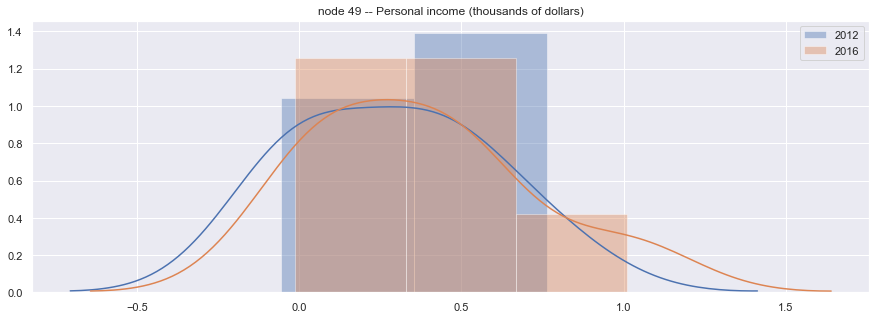

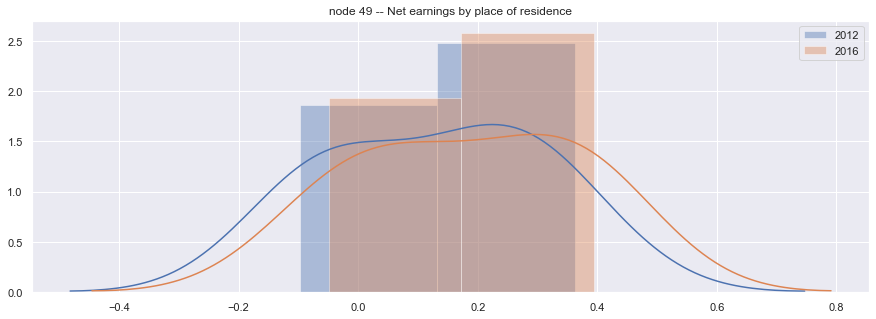

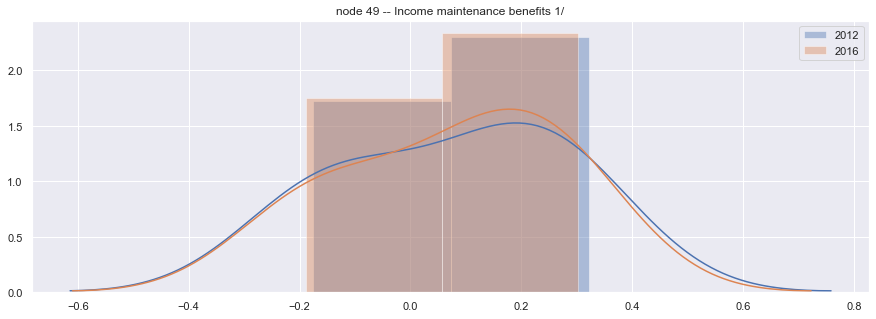

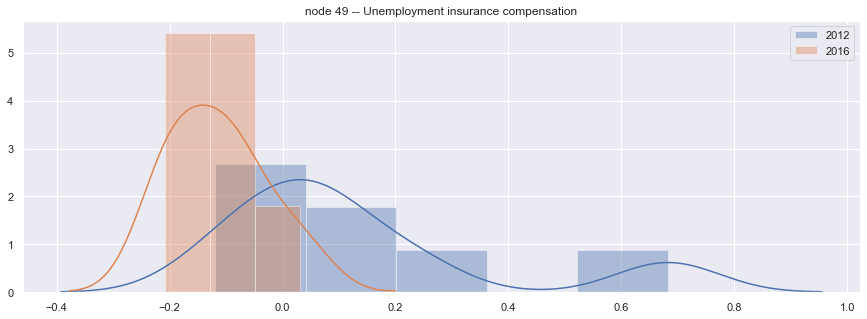

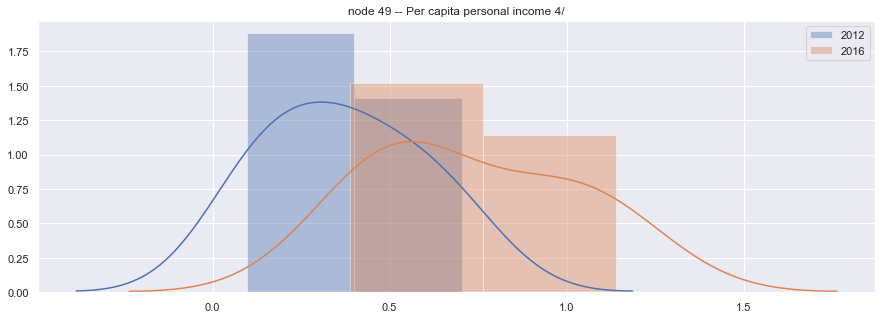

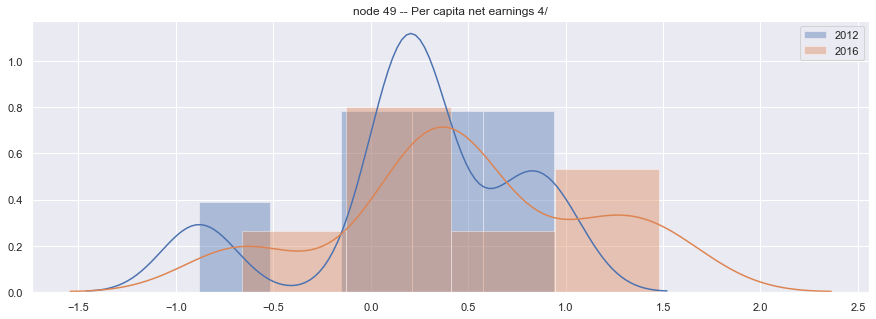

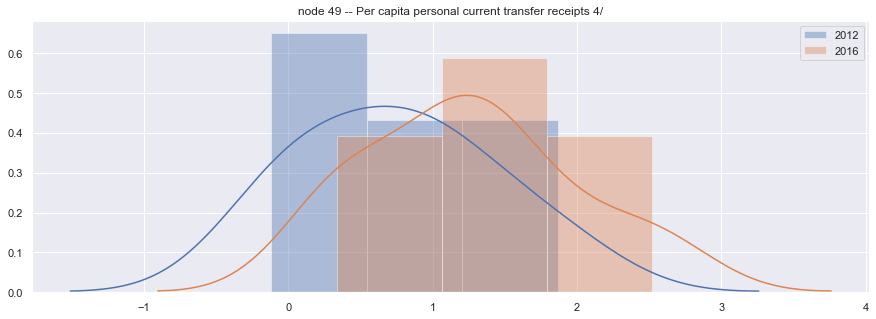

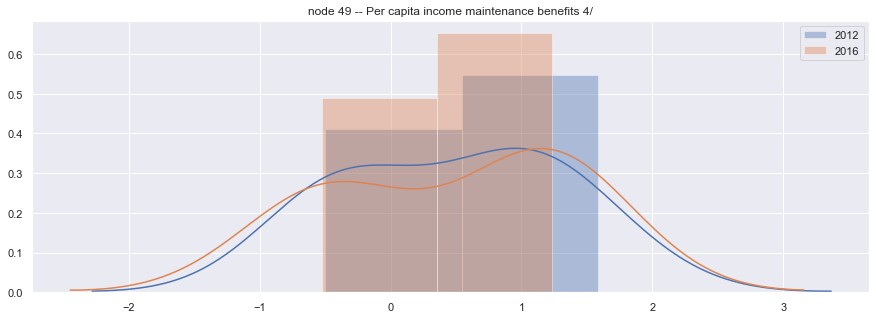

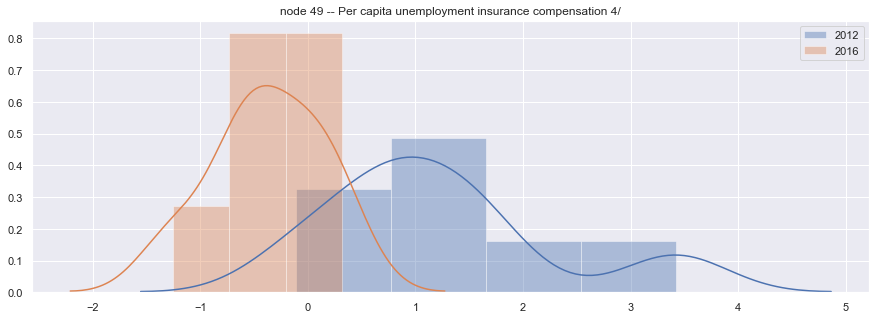

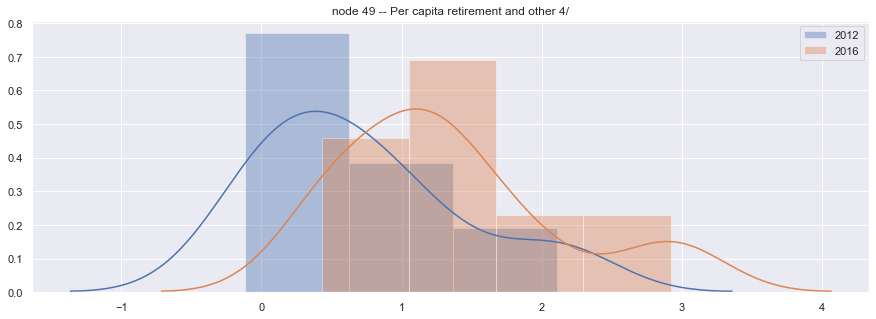

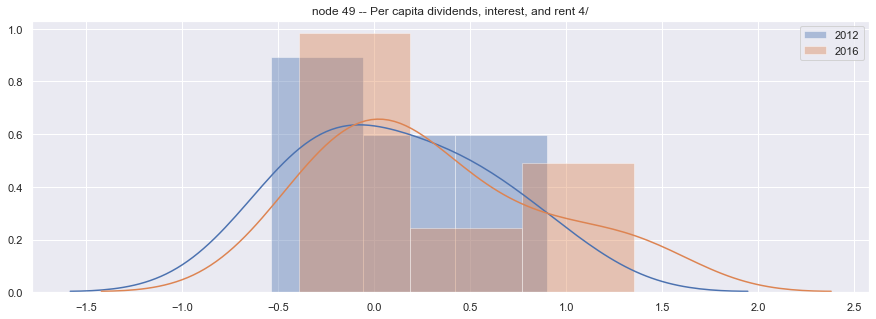

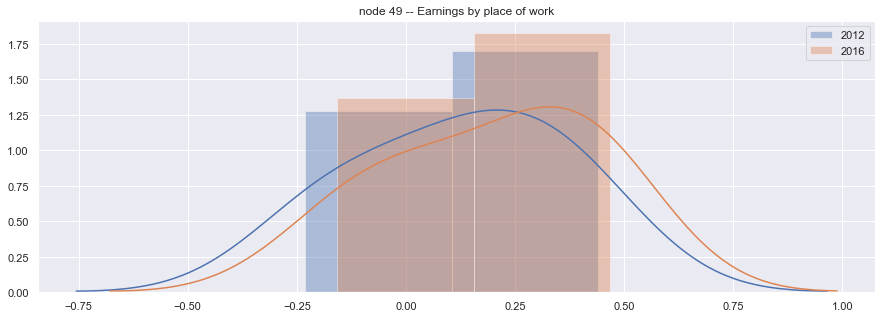

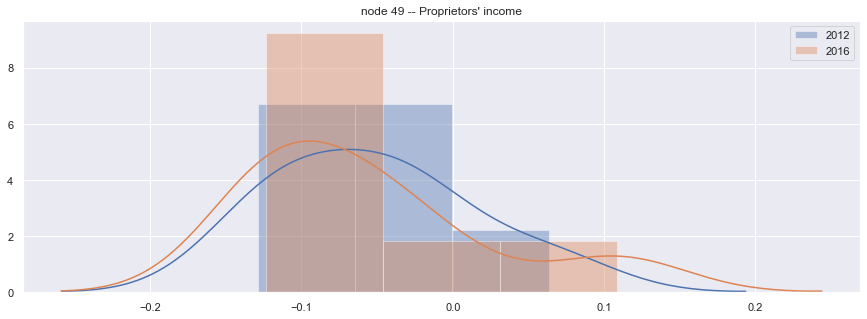

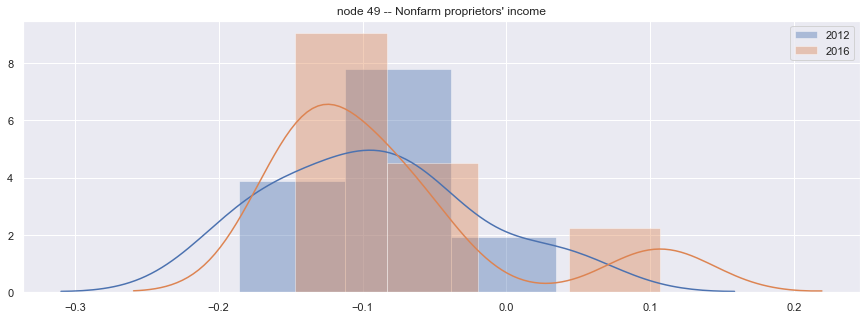

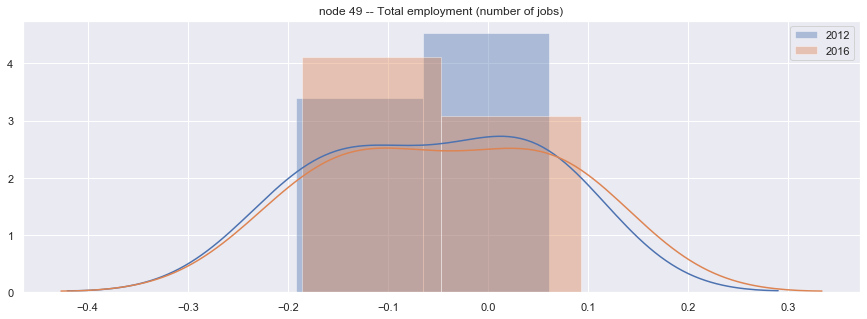

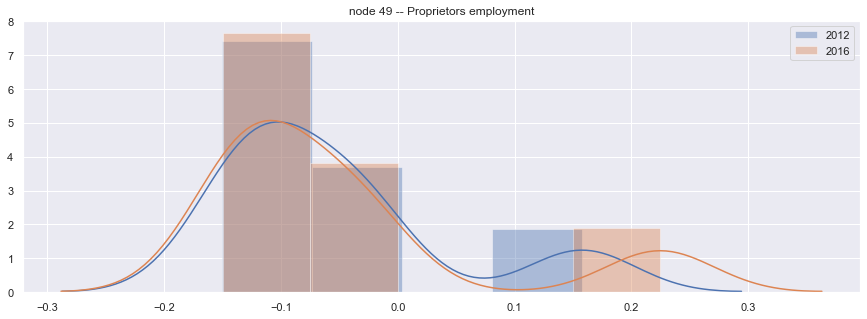

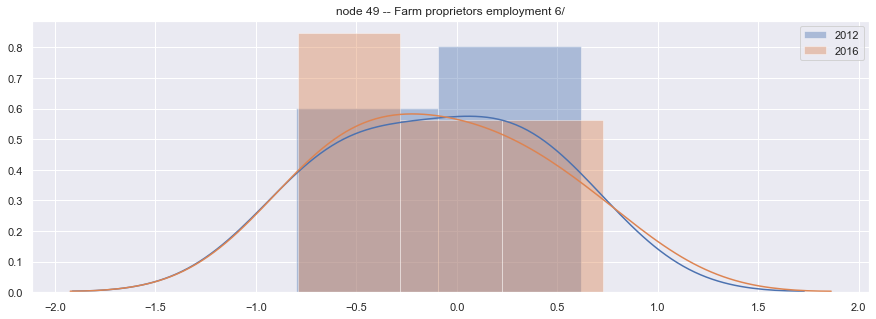

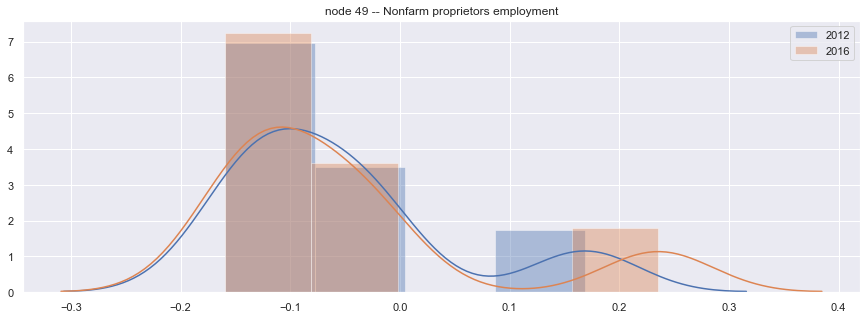

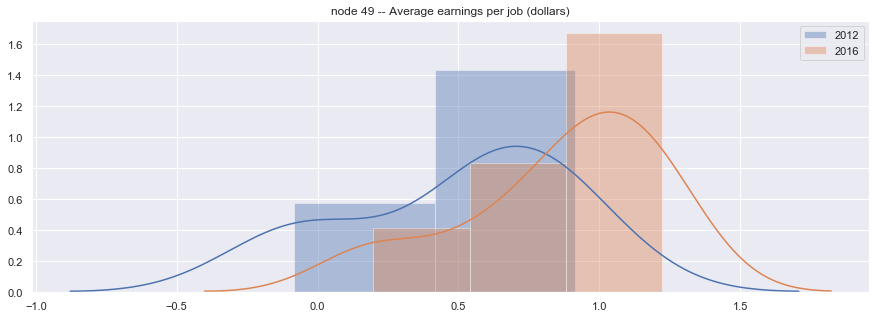

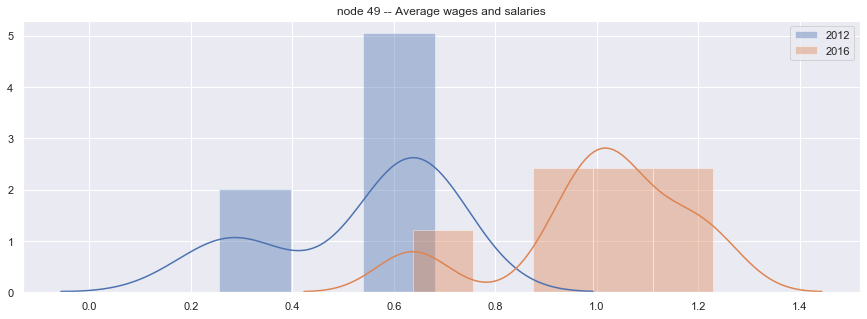

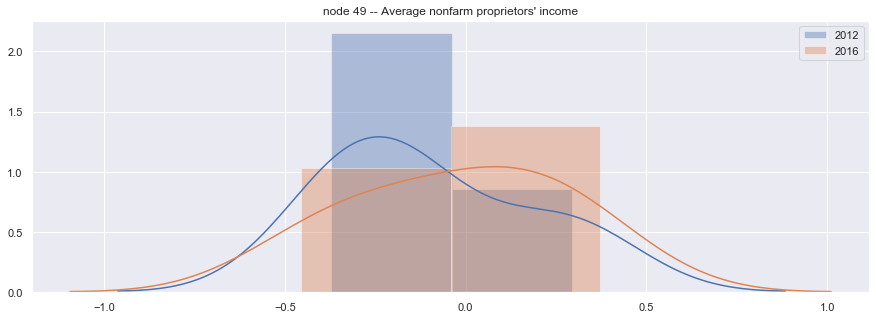

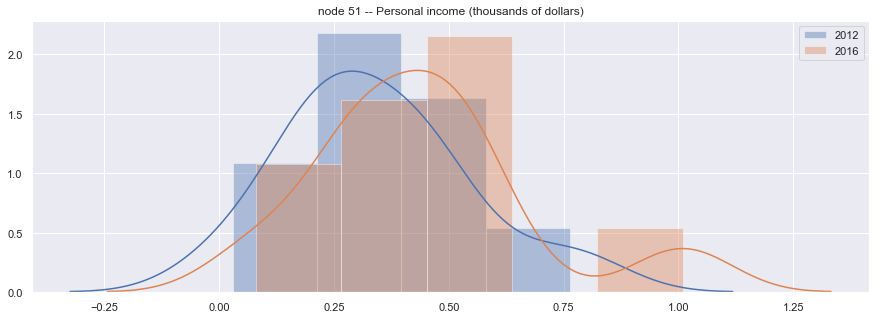

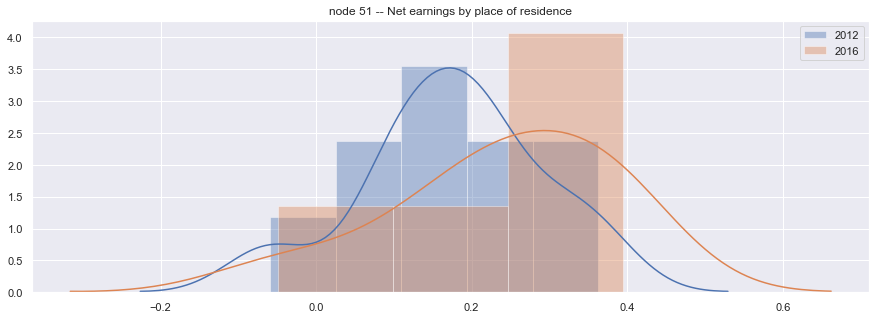

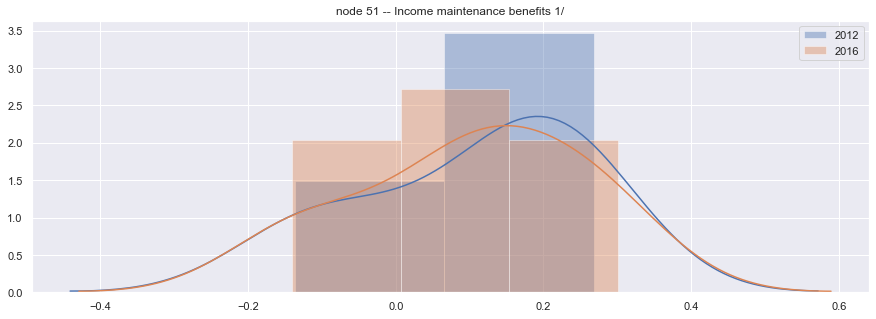

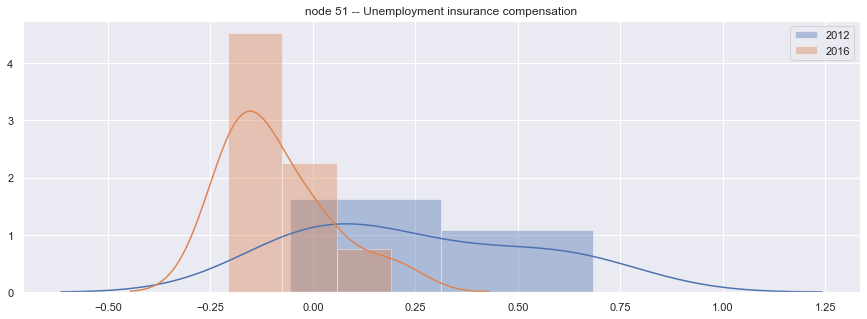

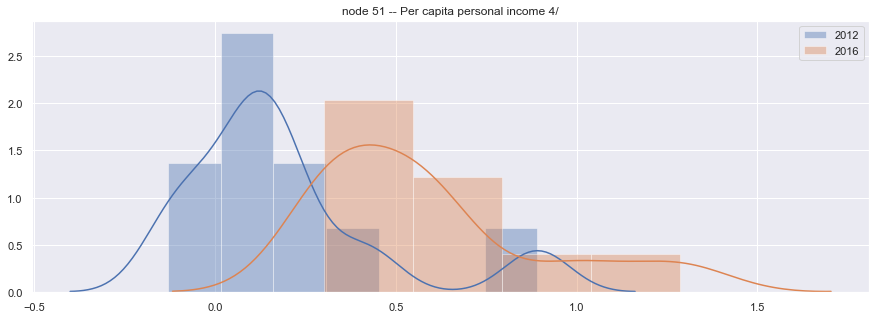

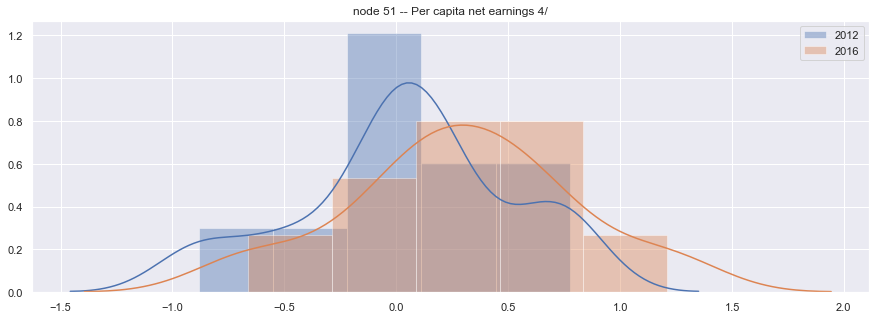

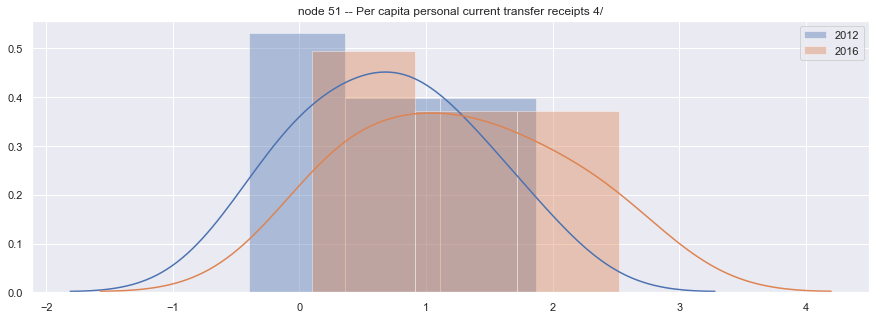

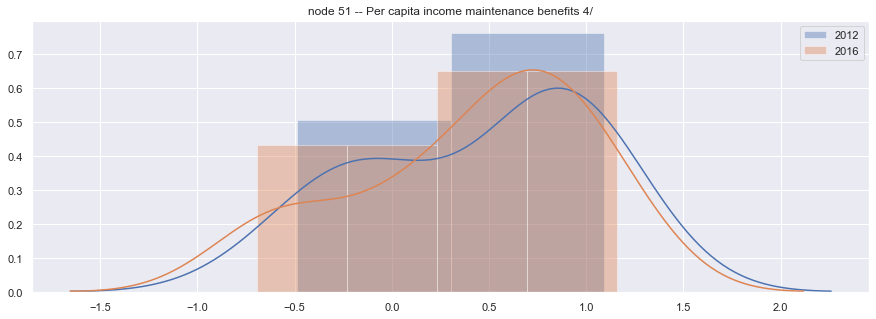

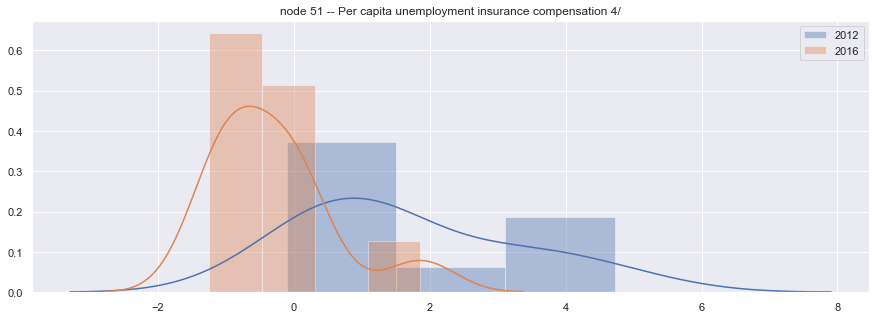

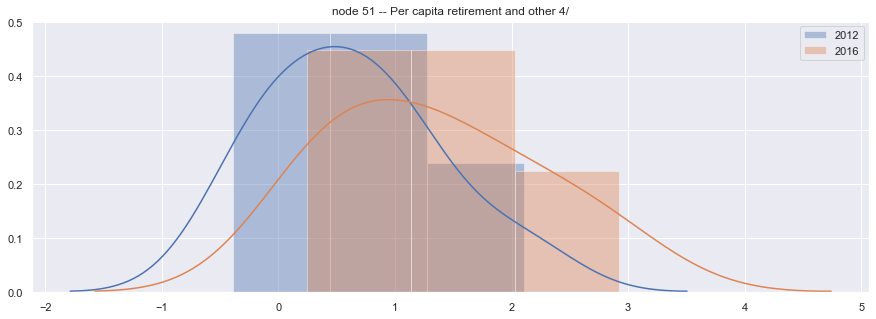

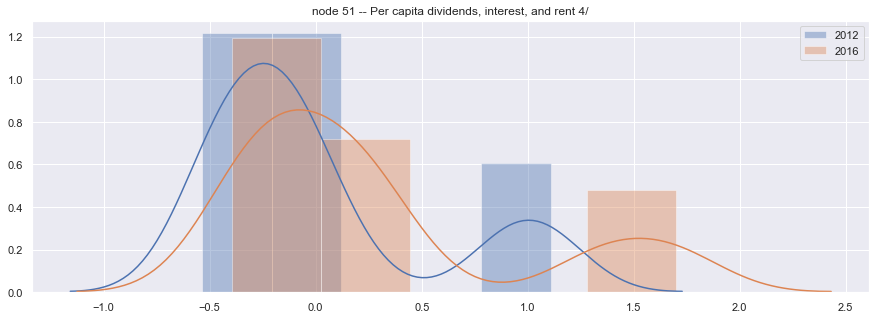

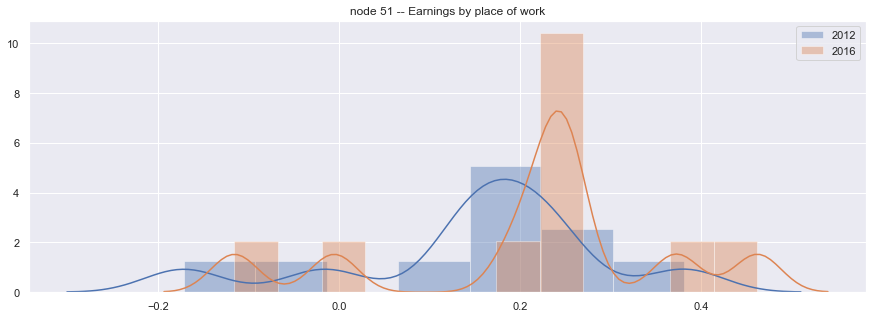

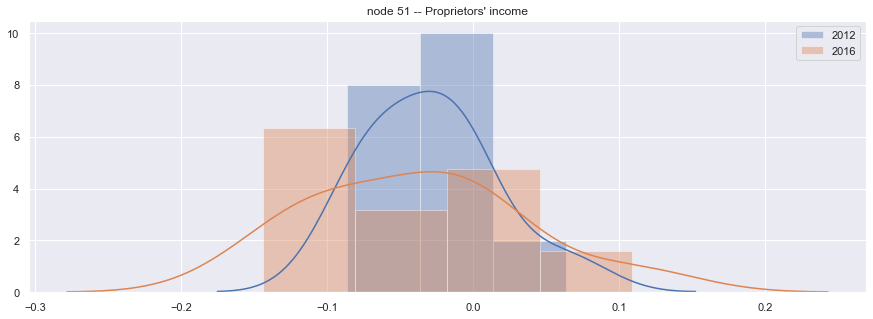

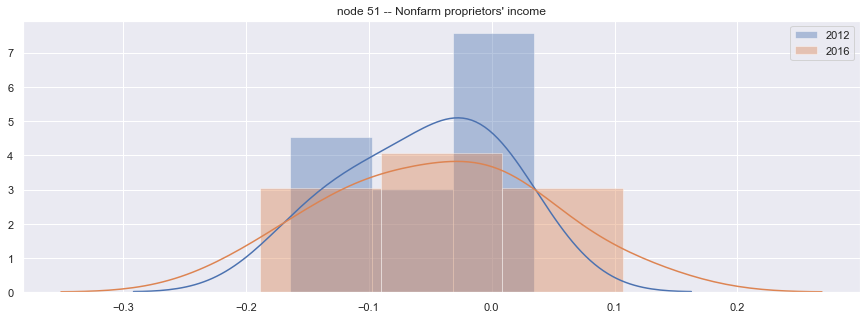

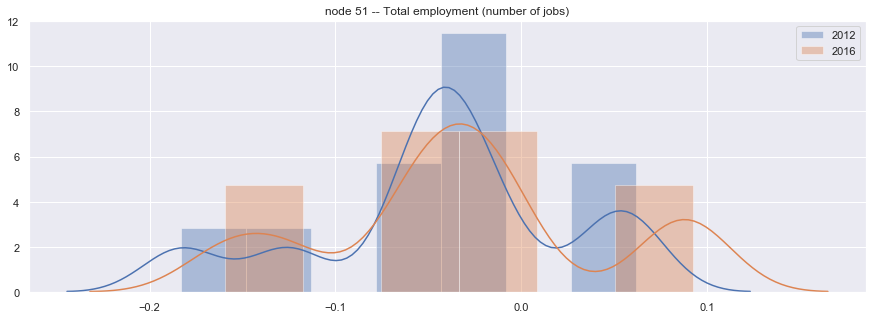

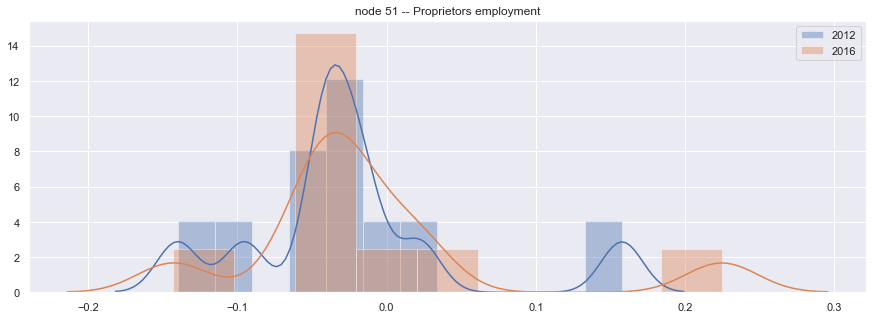

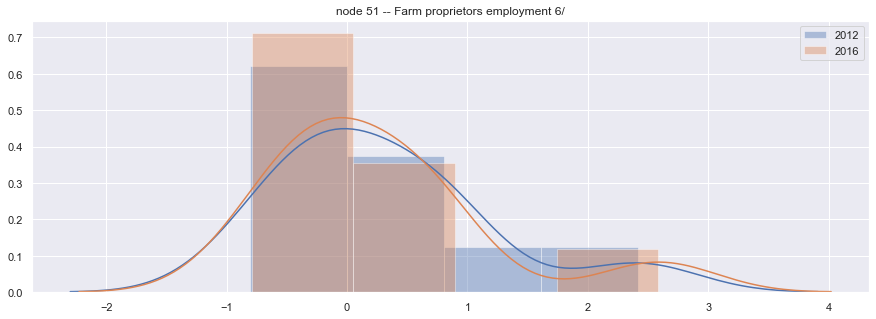

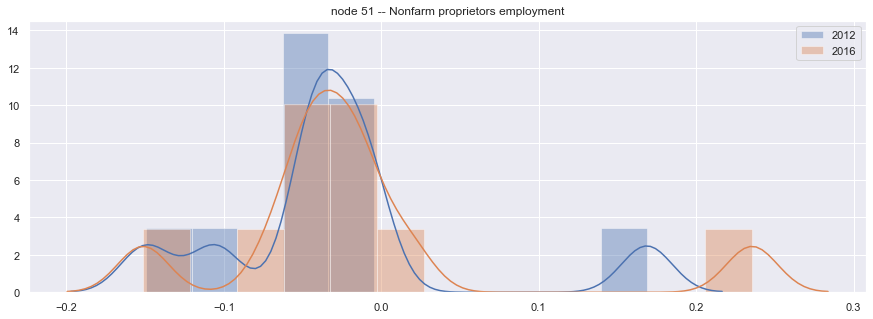

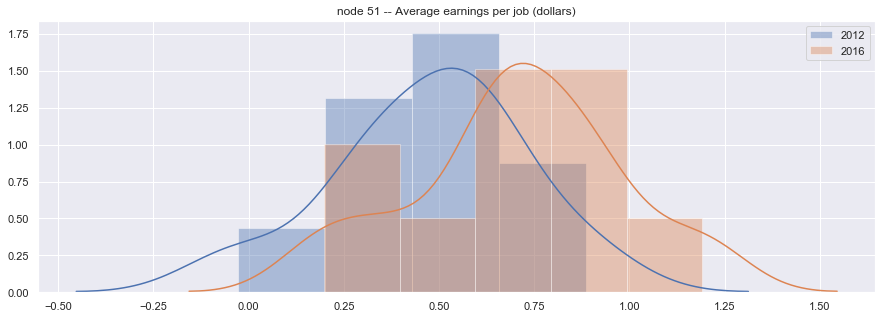

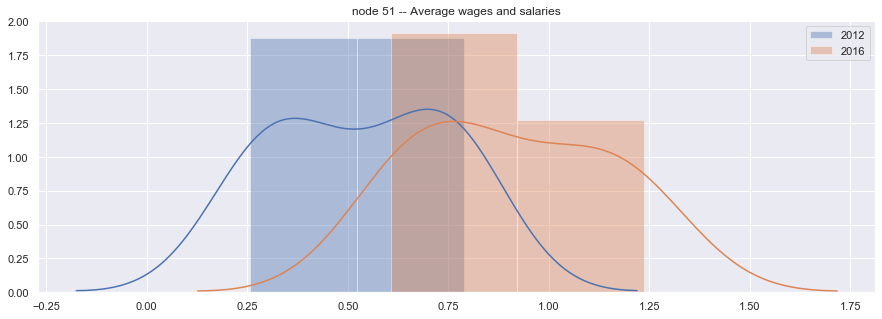

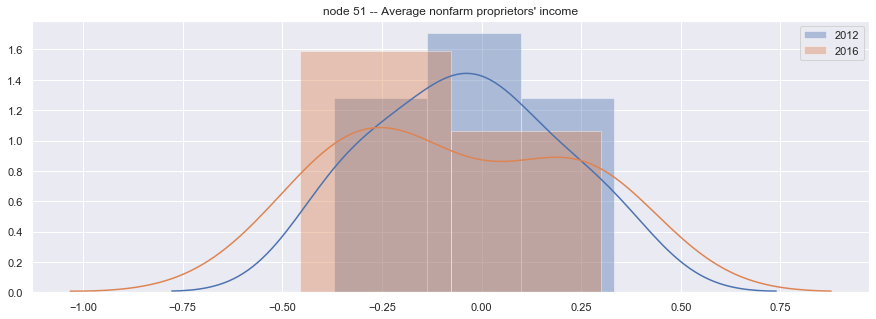

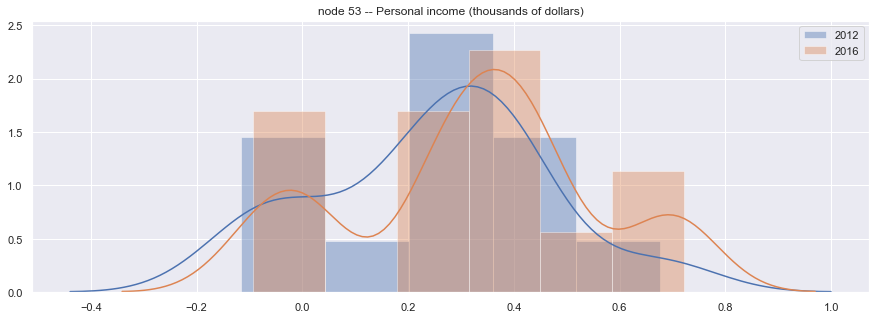

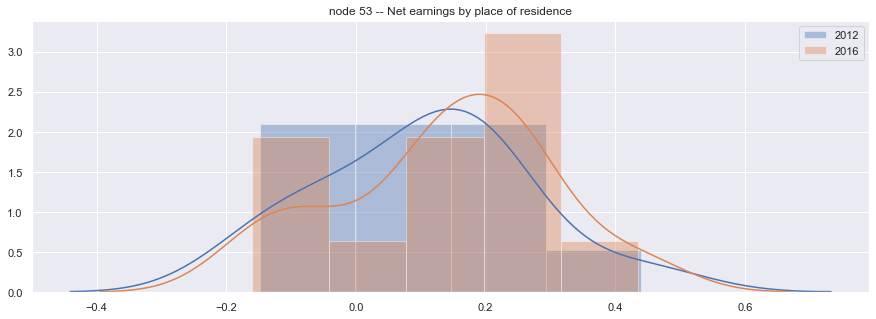

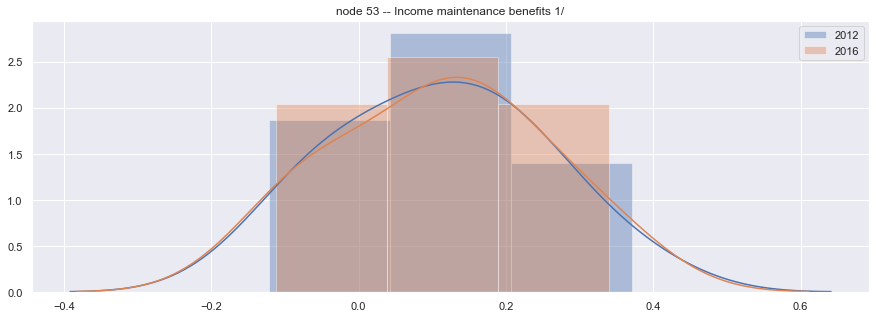

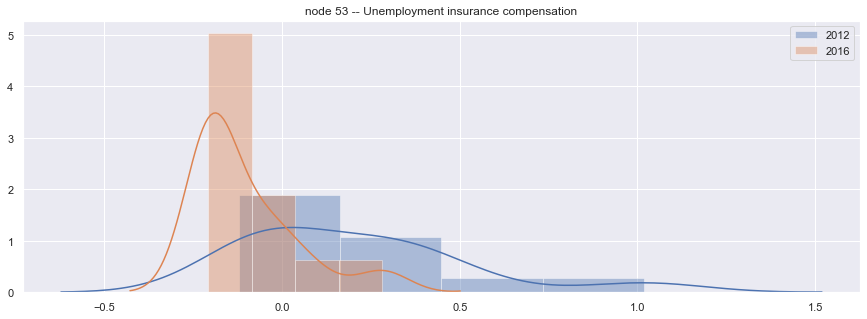

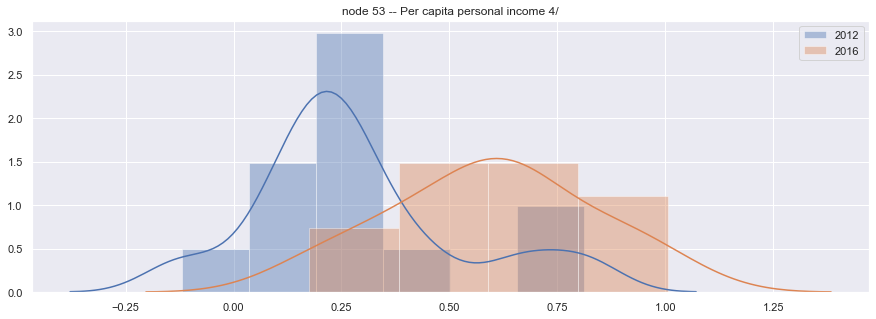

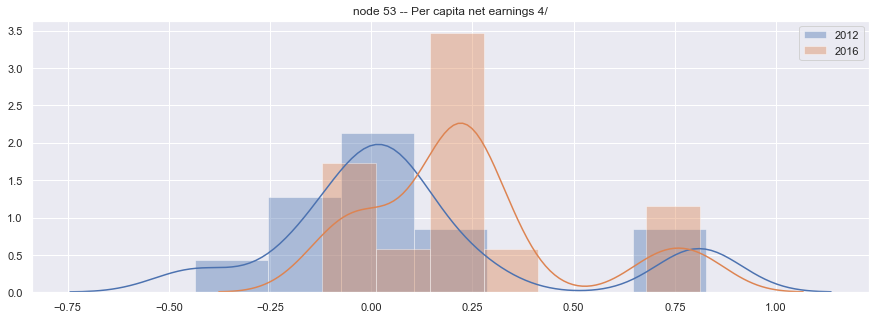

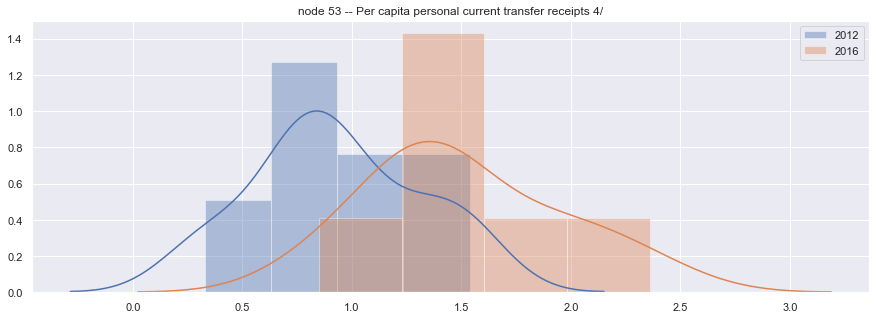

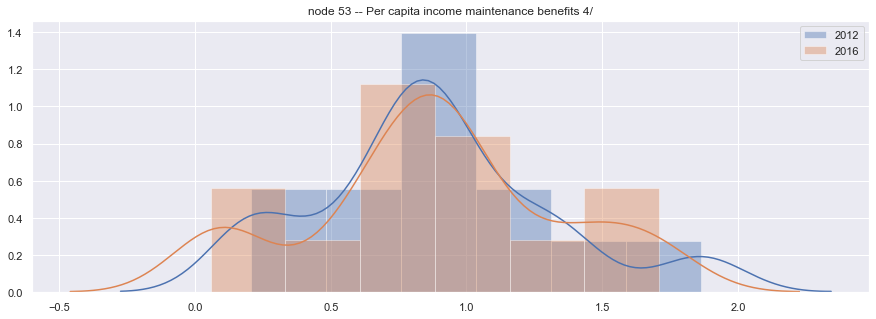

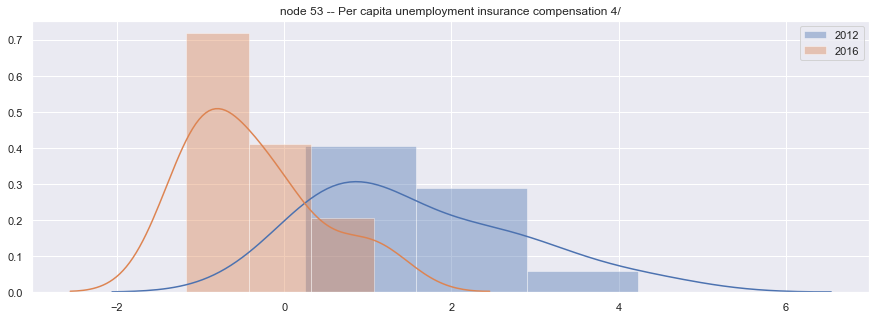

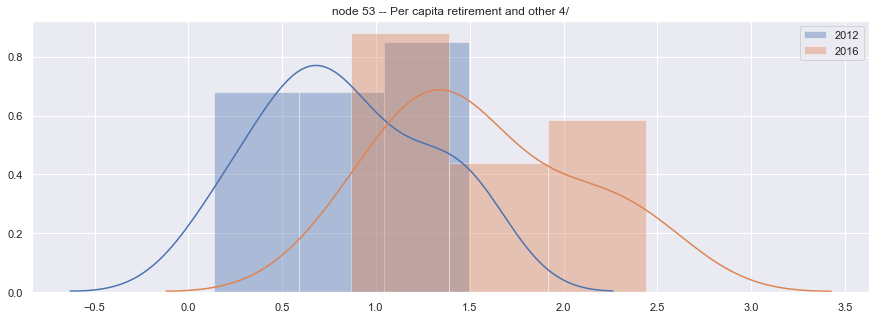

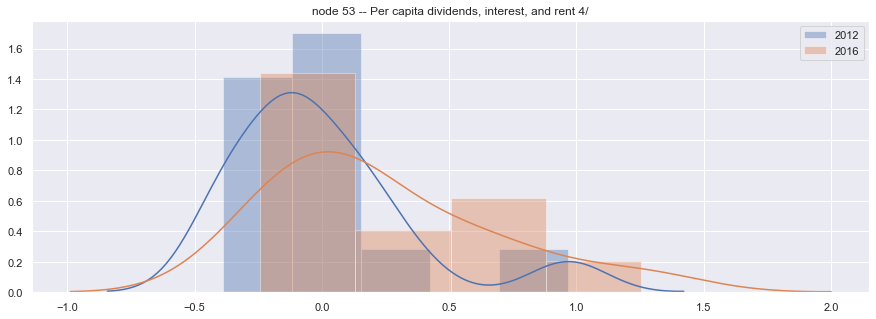

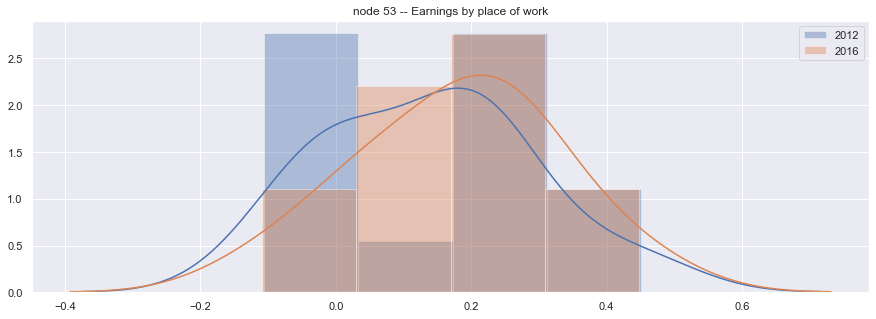

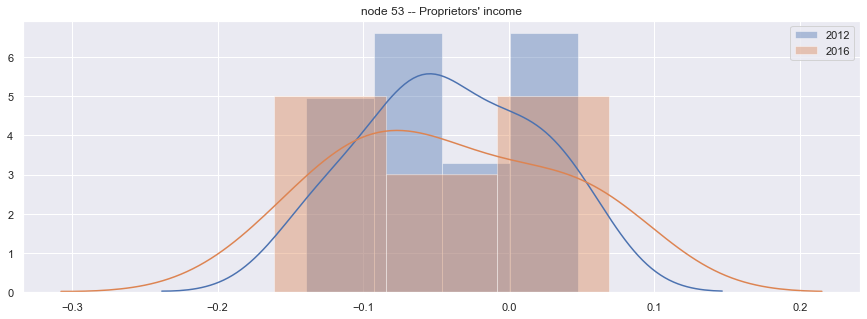

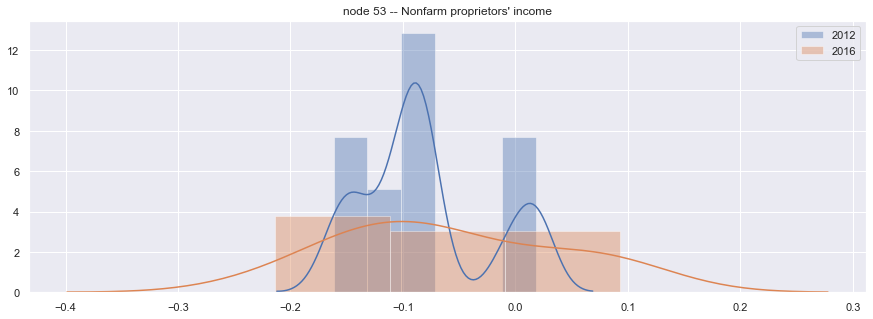

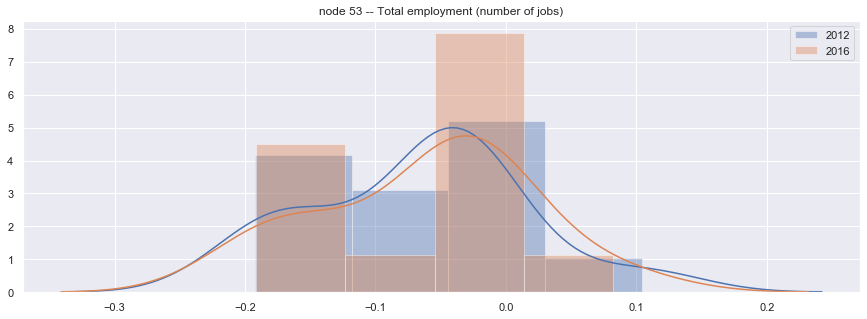

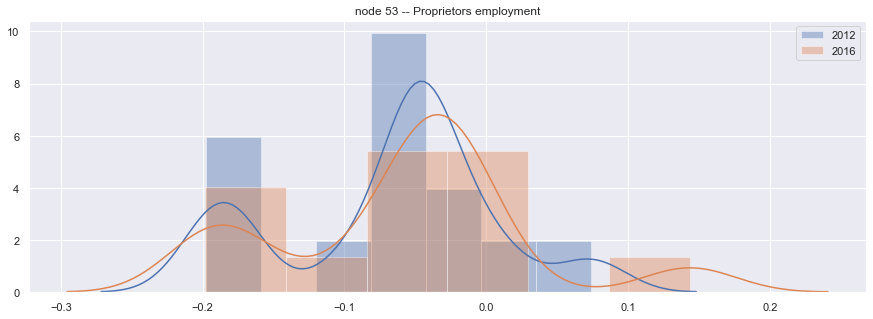

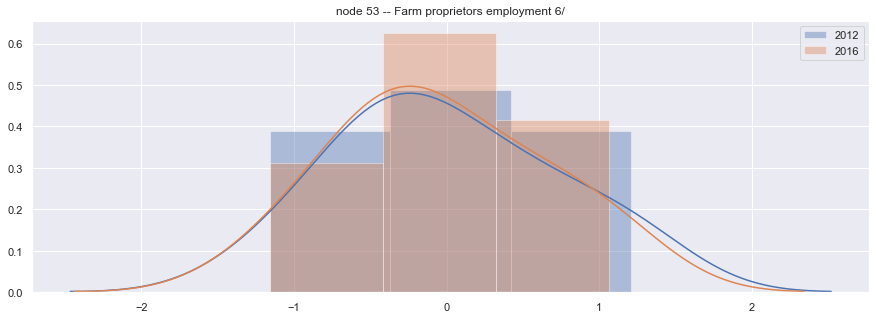

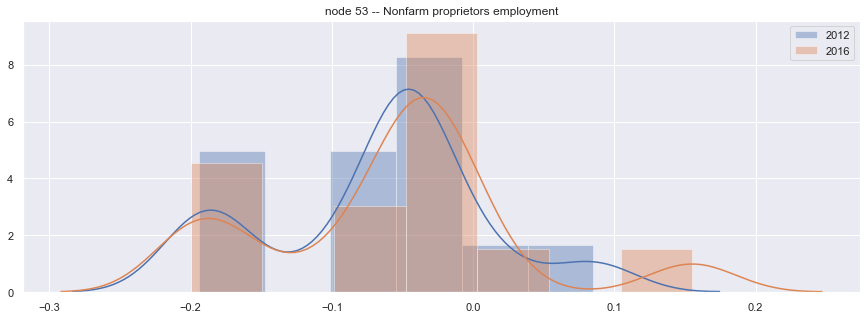

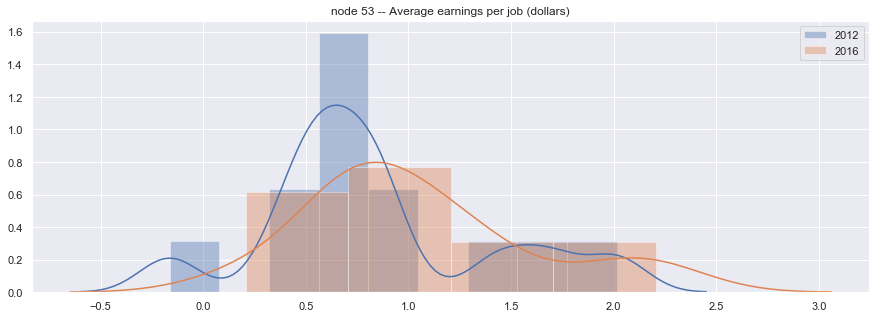

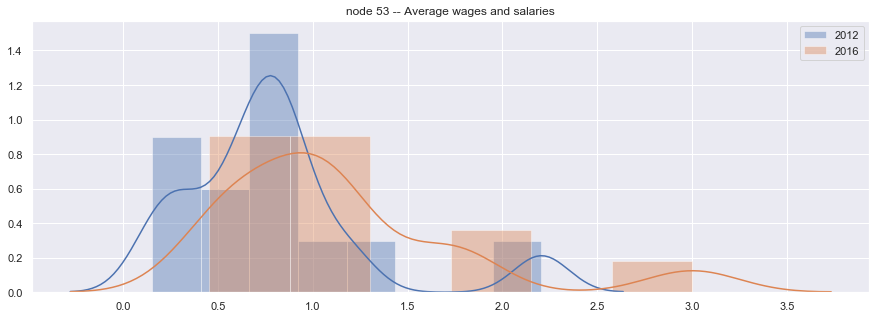

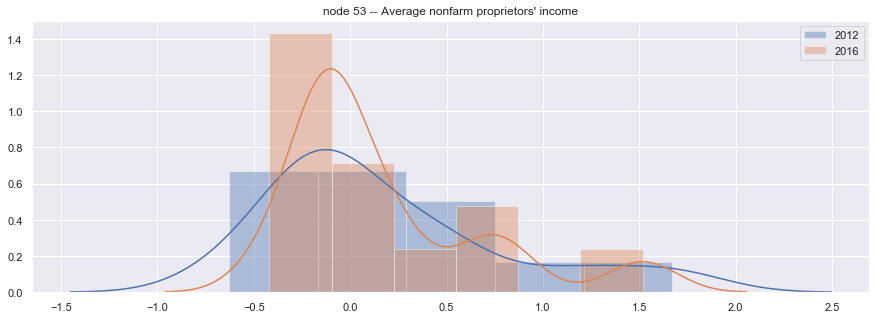

In [19]:
import matplotlib.pyplot as plt
cols2use = ['Personal income (thousands of dollars)',
            'Net earnings by place of residence',
            'Income maintenance benefits 1/',
            'Unemployment insurance compensation',
            'Per capita personal income 4/',
            'Per capita net earnings 4/',
            'Per capita personal current transfer receipts 4/',
            'Per capita income maintenance benefits 4/',
            'Per capita unemployment insurance compensation 4/',
            'Per capita retirement and other 4/',
            'Per capita dividends, interest, and rent 4/',
            'Earnings by place of work',
            "Proprietors' income",
            "Nonfarm proprietors' income",
            'Total employment (number of jobs)',
            'Proprietors employment',
            'Farm proprietors employment 6/',
            'Nonfarm proprietors employment',
            'Average earnings per job (dollars)',
            'Average wages and salaries',
            "Average nonfarm proprietors' income"]

for col in range(data.shape[1]):
    plt.figure(figsize=(15, 5))
    plt.title(f'node 49 -- {cols2use[col]}')
    sns.distplot(data_per_year['2012'][list(dict(mapper._nodes.items()).values())[49]._labels][:, col])
    sns.distplot(data_per_year['2016'][list(dict(mapper._nodes.items()).values())[49]._labels][:, col])
    plt.legend(['2012', '2016'])

for col in range(data.shape[1]):
    plt.figure(figsize=(15, 5))
    plt.title(f'node 51 -- {cols2use[col]}')
    sns.distplot(data_per_year['2012'][list(dict(mapper._nodes.items()).values())[51]._labels][:, col])
    sns.distplot(data_per_year['2016'][list(dict(mapper._nodes.items()).values())[51]._labels][:, col])
    plt.legend(['2012', '2016'])

for col in range(data.shape[1]):
    plt.figure(figsize=(15, 5))
    plt.title(f'node 53 -- {cols2use[col]}')
    sns.distplot(data_per_year['2012'][list(dict(mapper._nodes.items()).values())[53]._labels][:, col])
    sns.distplot(data_per_year['2016'][list(dict(mapper._nodes.items()).values())[53]._labels][:, col])
    plt.legend(['2012', '2016'])

In [20]:
col = 'Average earnings per job (dollars)'
get_colored_mapper_3dplot(mapper,
                          df[df['year'] == 2016].reset_index(drop=True),
                          col, seed=14, size_offset=12)